In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (22, 8)
import seaborn as sns
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

In [2]:
df = pd.read_csv('Students Social Media Addiction.csv')
df.shape

(705, 13)

In [3]:
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [4]:
#drop Student_ID
df.drop('Student_ID', axis=1, inplace=True)
df.head()

,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [5]:
#info
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           705 non-null    int64  
 1   Gender                        705 non-null    str    
 2   Academic_Level                705 non-null    str    
 3   Country                       705 non-null    str    
 4   Avg_Daily_Usage_Hours         705 non-null    float64
 5   Most_Used_Platform            705 non-null    str    
 6   Affects_Academic_Performance  705 non-null    str    
 7   Sleep_Hours_Per_Night         705 non-null    float64
 8   Mental_Health_Score           705 non-null    int64  
 9   Relationship_Status           705 non-null    str    
 10  Conflicts_Over_Social_Media   705 non-null    int64  
 11  Addicted_Score                705 non-null    int64  
dtypes: float64(2), int64(4), str(6)
memory usage: 95.5 KB


In [6]:
#null values
df.isnull().sum()

Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

In [7]:
#duplicates
df.duplicated().sum()

np.int64(1)

In [8]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [9]:
# categorical columns
df.select_dtypes(include = ['string']).head()

,Gender,Academic_Level,Country,Most_Used_Platform,Affects_Academic_Performance,Relationship_Status
0,Female,Undergraduate,Bangladesh,Instagram,Yes,In Relationship
1,Male,Graduate,India,Twitter,No,Single
2,Female,Undergraduate,USA,TikTok,Yes,Complicated
3,Male,High School,UK,YouTube,No,Single
4,Male,Graduate,Canada,Facebook,Yes,In Relationship


In [10]:
# numerical columns
df.select_dtypes(include = ['number']).head()

,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
0,19,5.2,6.5,6,3,8
1,22,2.1,7.5,8,0,3
2,20,6.0,5.0,5,4,9
3,18,3.0,7.0,7,1,4
4,21,4.5,6.0,6,2,7


# Exploratory Data Analysis

Text(0.5, 1.0, 'Average Age of Male Students in Each Country')

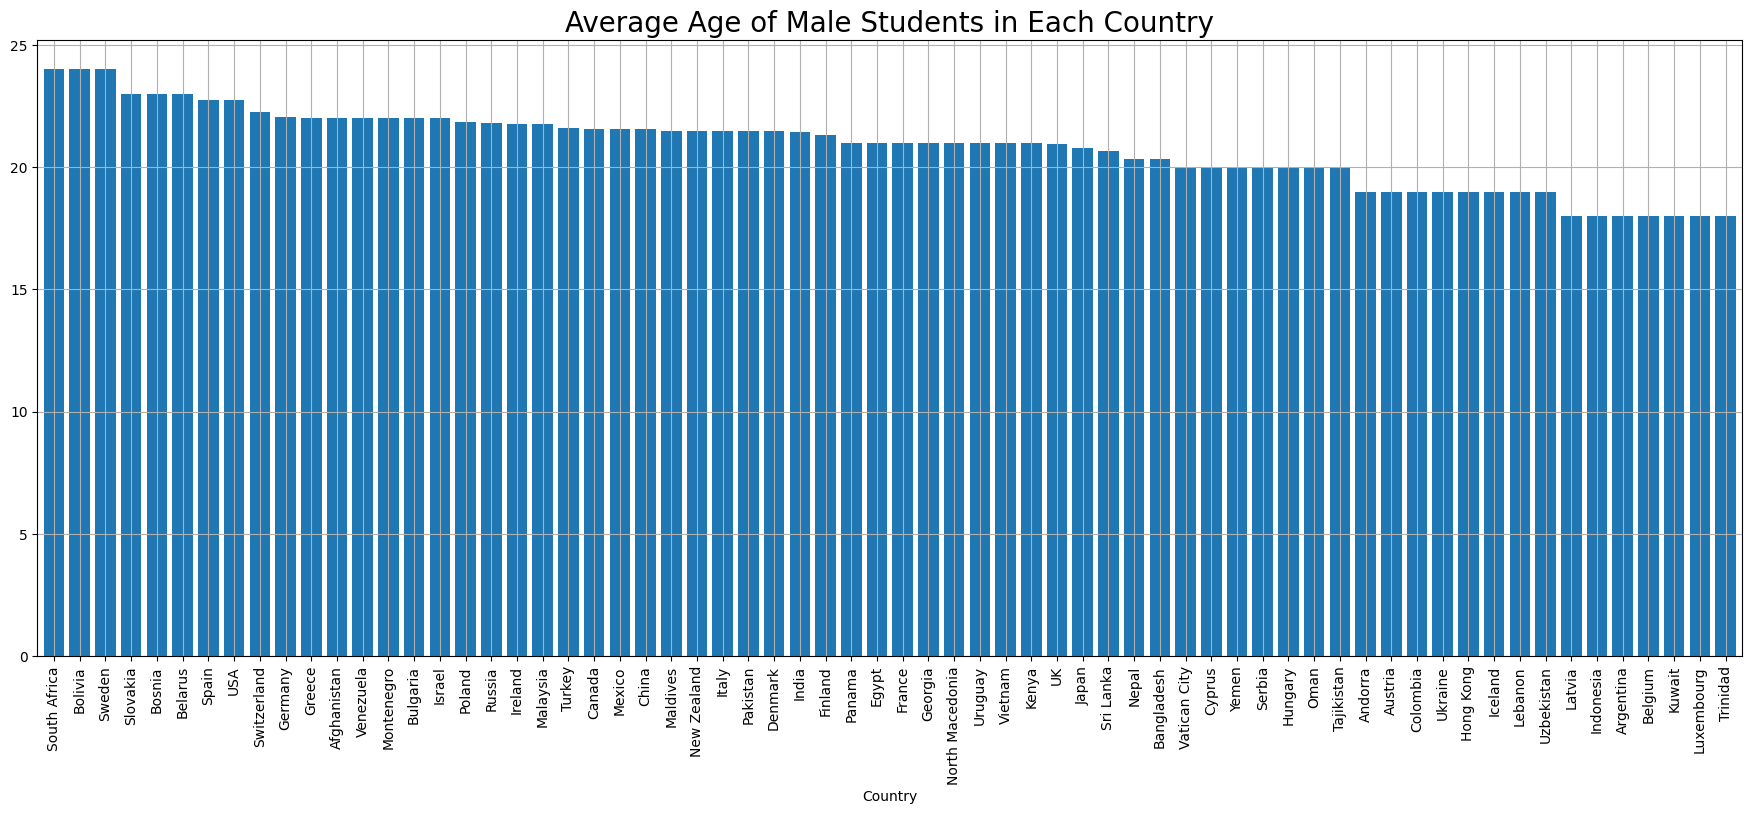

In [11]:
# average age of male students in each country
df[df.Gender == 'Male'].groupby(['Country'])['Age'].mean().fillna(0).sort_values(ascending=False).plot(kind='bar',
          width=0.8, grid=True)
plt.title('Average Age of Male Students in Each Country', fontsize=20)


Text(0.5, 1.0, 'Average Age of FeMale Students in Each Country')

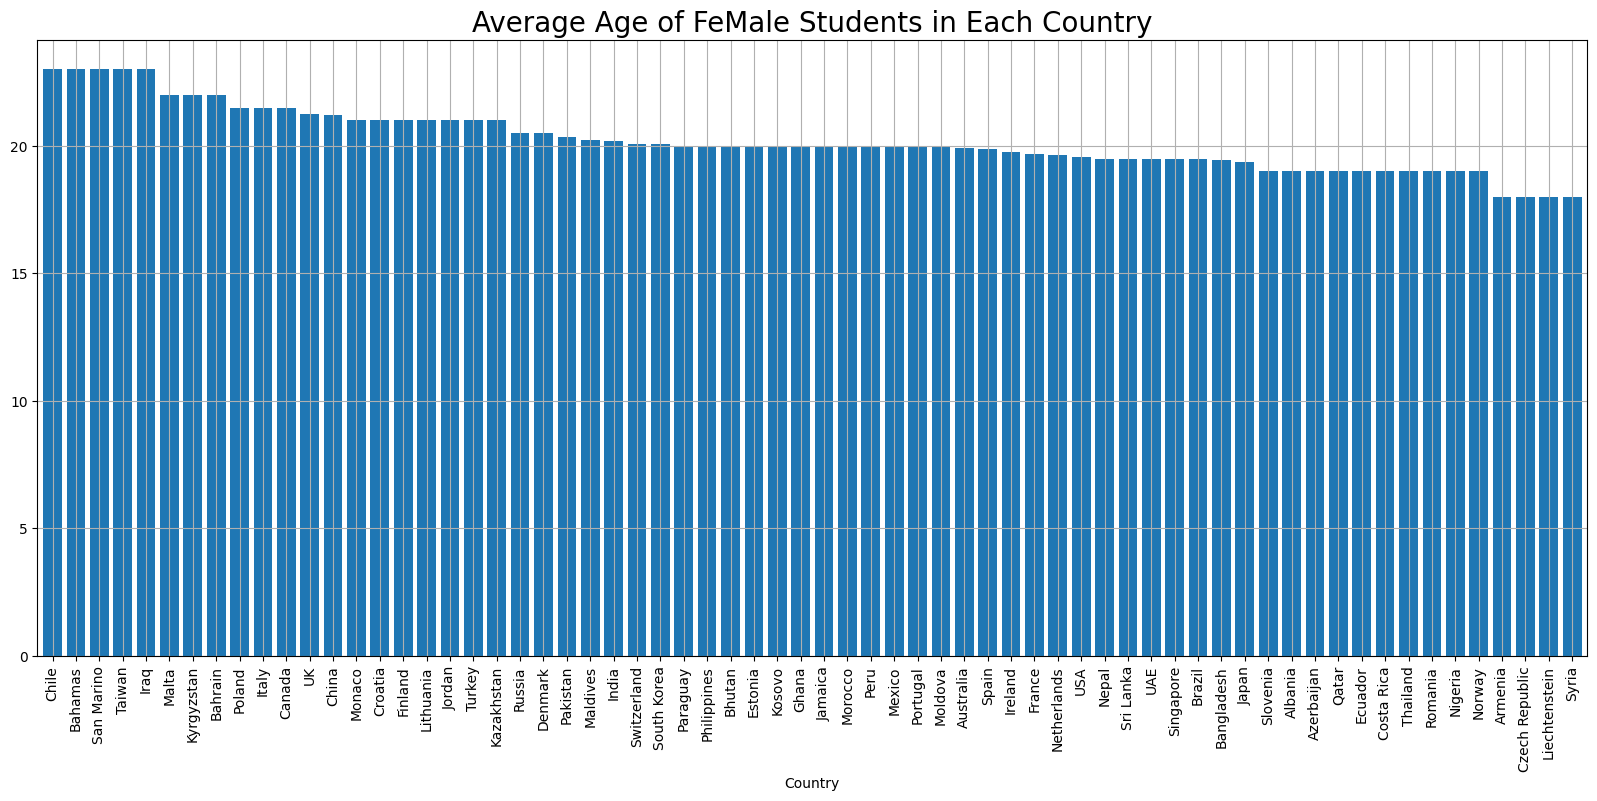

In [12]:
# average age of Female students in each country
df[df.Gender == 'Female'].groupby(['Country'])['Age'].mean().fillna(0).sort_values(ascending=False).plot(kind = 'bar', stacked = True, figsize=(20, 8),
          width=0.8, grid=True)
plt.title('Average Age of FeMale Students in Each Country', fontsize=20)

Text(0.5, 1.0, 'Percentage of Male and Female Students in Each Academic Level')

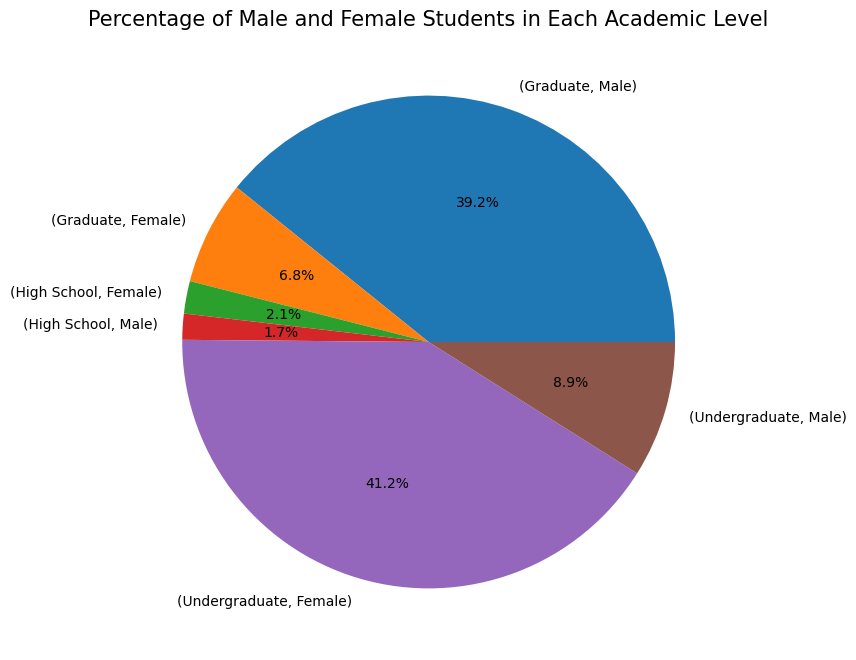

In [13]:
# percentage of male and female students in each academic level
df.groupby(['Academic_Level'])['Gender'].value_counts().plot(kind = 'pie', figsize=(20, 8), subplots=True,autopct='%1.1f%%')
plt.title('Percentage of Male and Female Students in Each Academic Level', fontsize=15)

mostly under_graduate female and graduate male students  are active social media

Text(0.5, 1.0, 'Percentage of Male and Female Students in Each Academic Level in INDIA')

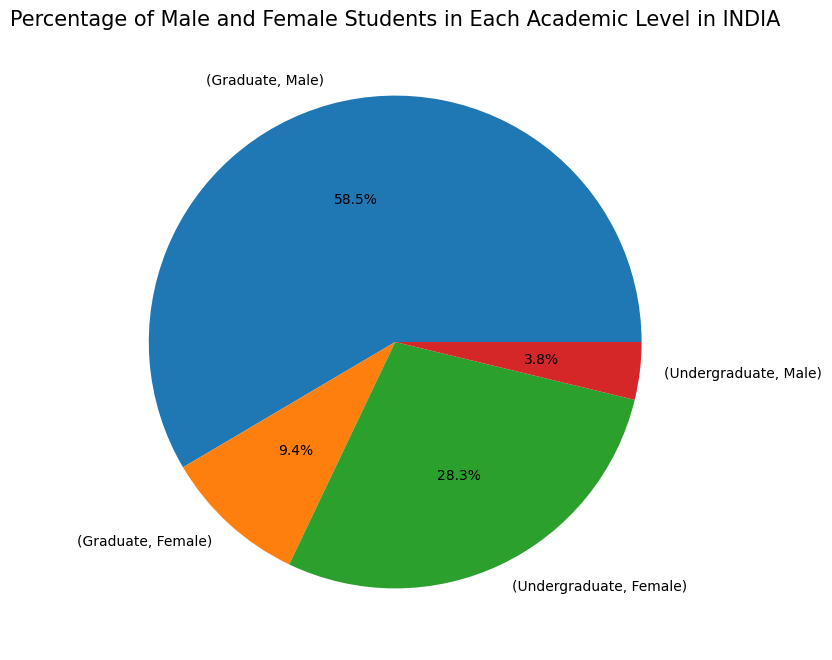

In [14]:
# let's check same stats in India
df[df.Country == 'India'].groupby(['Academic_Level'])['Gender'].value_counts().plot(kind = 'pie', figsize=(20, 8), subplots=True,autopct='%1.1f%%')
plt.title('Percentage of Male and Female Students in Each Academic Level in INDIA', fontsize=15)

same statistics

Text(0.5, 1.0, 'Average Daily Usage Hours in Each Country')

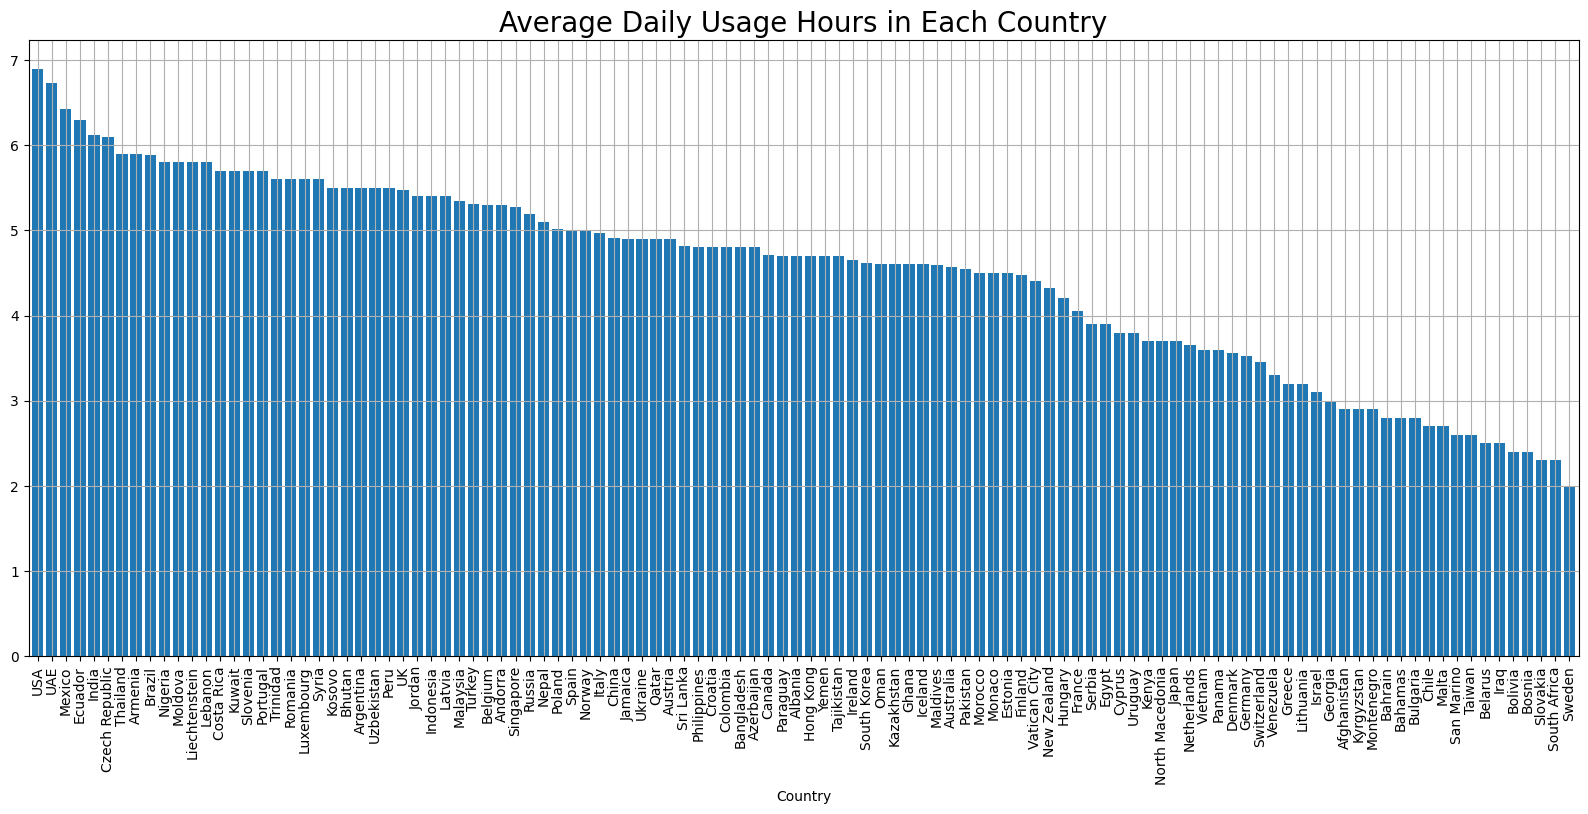

In [15]:
# Avg_Daily_Usage_Hours in each country
df.groupby(['Country'])['Avg_Daily_Usage_Hours'].mean().sort_values(ascending=False).plot(kind = 'bar', figsize=(20, 8), width=0.8, grid=True)
plt.title('Average Daily Usage Hours in Each Country', fontsize=20)

USA has most active hours and Sweden has least

Text(0.5, 1.0, 'Average Daily Usage Hours as per Gender')

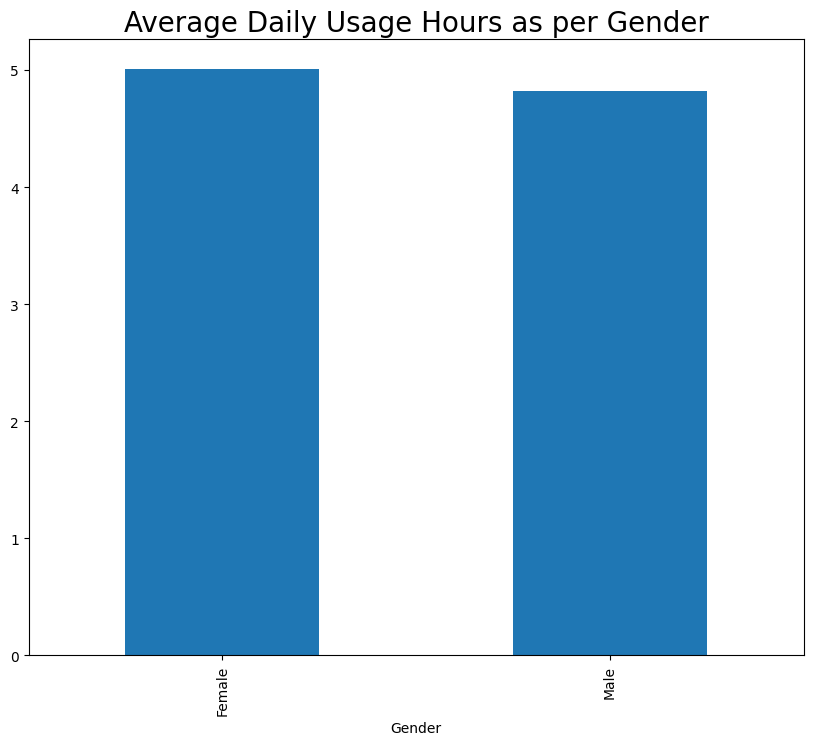

In [16]:
# Avg_Daily_Usage_Hours as per gender
df.groupby(['Gender'])['Avg_Daily_Usage_Hours'].mean().sort_values(ascending=False).plot(kind = 'bar',figsize=(10, 8))
plt.title('Average Daily Usage Hours as per Gender', fontsize=20)

Female students are more active on social media

Text(0.5, 1.0, 'Average Daily Usage Hours of Male Students in Each Country')

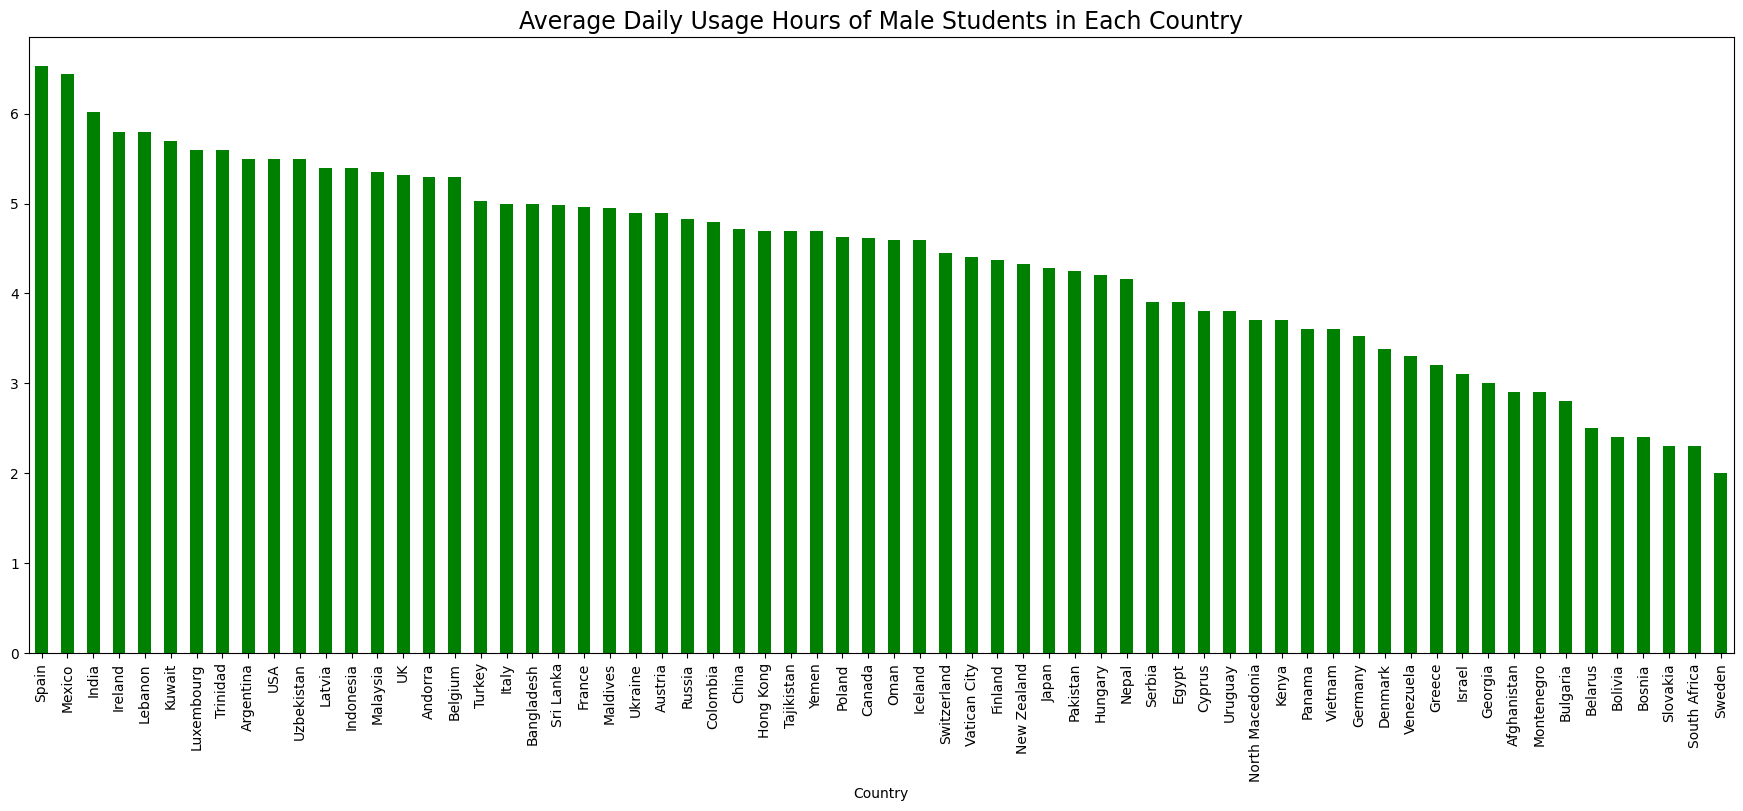

In [17]:
# Avg_Daily_Usage_Hours of male students in each country
df[df['Gender'] == 'Male'].groupby(['Country'])['Avg_Daily_Usage_Hours'].mean().sort_values(ascending = False).plot(kind = 'bar', color = 'g')
plt.title('Average Daily Usage Hours of Male Students in Each Country', fontsize=17)    

Text(0.5, 1.0, 'Average Daily Usage Hours of Female Students in Each Country')

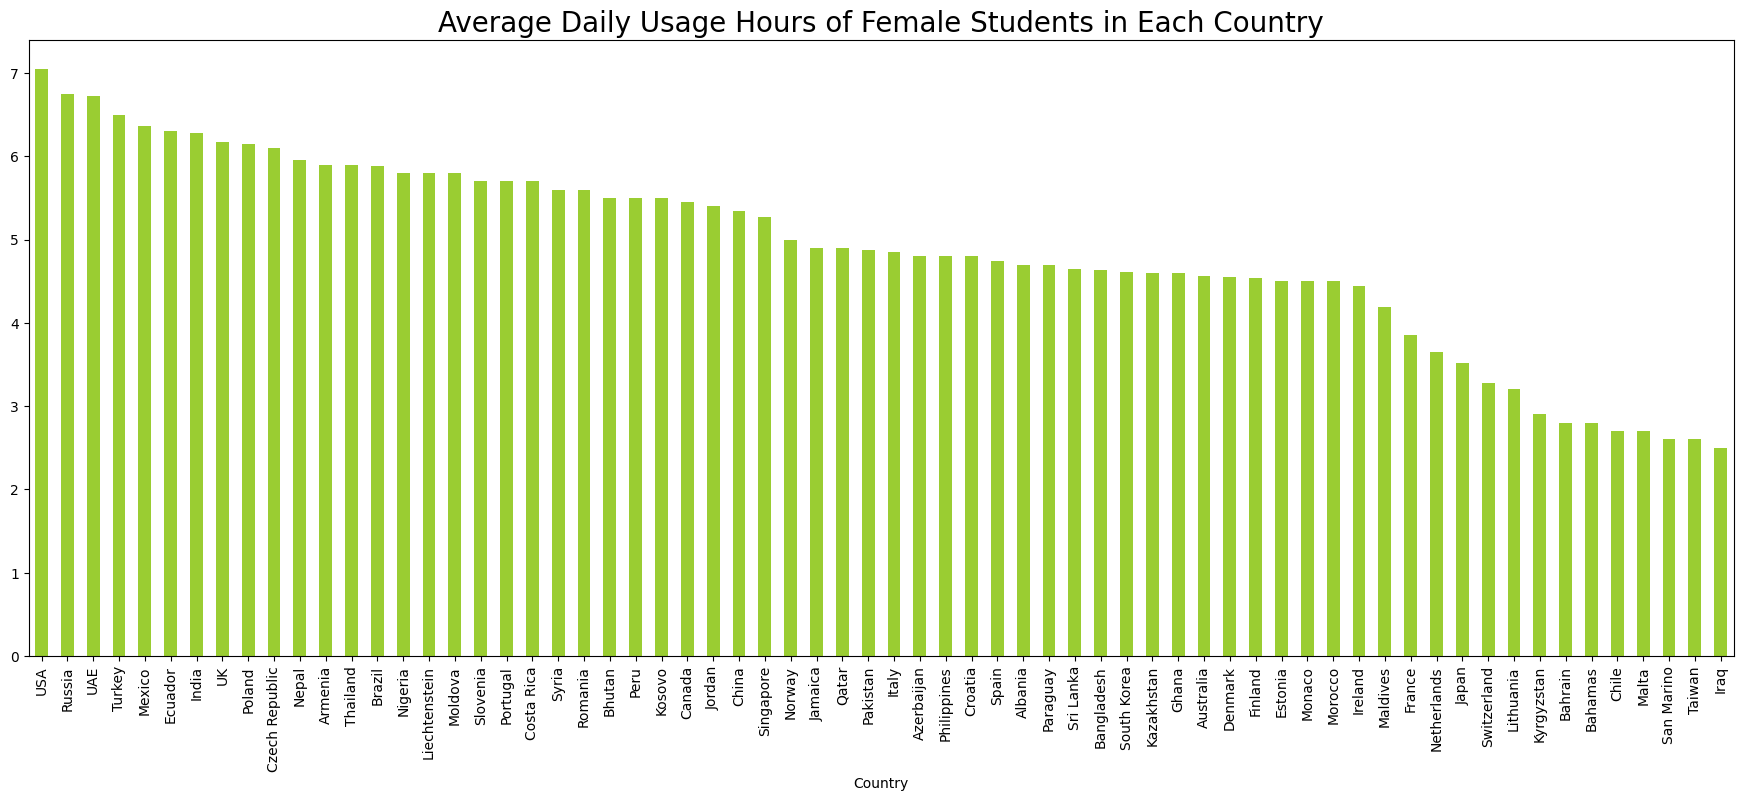

In [18]:
# Avg_Daily_Usage_Hours of Female students in each country
df[df['Gender'] == 'Female'].groupby(['Country'])['Avg_Daily_Usage_Hours'].mean().sort_values(ascending = False).plot(kind = 'bar', color = 'yellowgreen')
plt.title('Average Daily Usage Hours of Female Students in Each Country', fontsize=20)

least no. of females students are in Iraq, makes sense

Text(0.5, 1.0, 'Sleep Hours Per Night of each country')

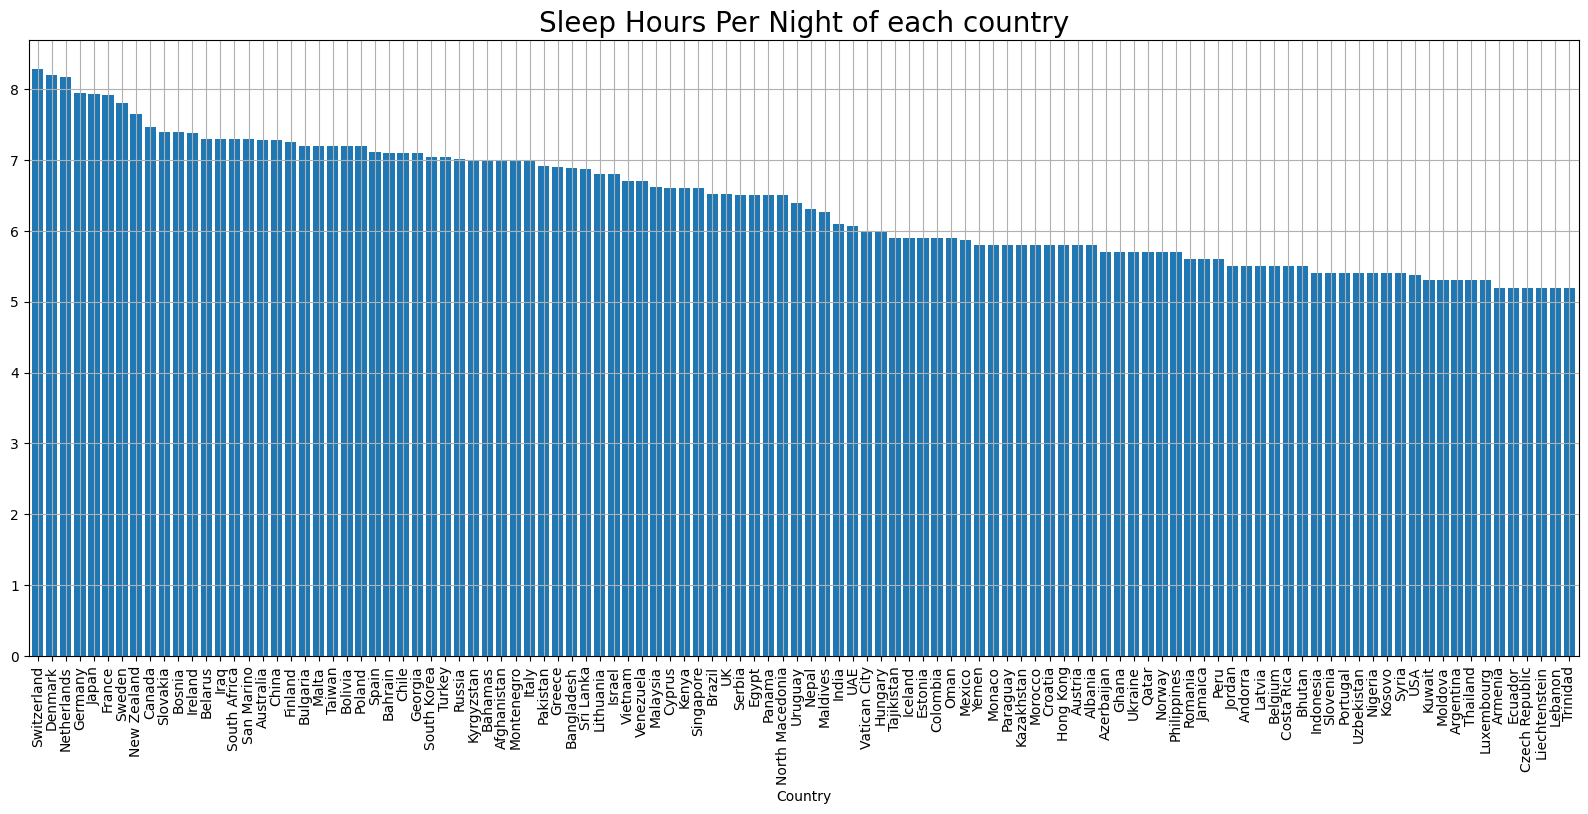

In [19]:
# Sleep_Hours_Per_Night of each country
df.groupby(['Country'])['Sleep_Hours_Per_Night'].mean().sort_values(ascending=False).plot(kind = 'bar', figsize=(20, 8), width=0.8, grid=True)
plt.title('Sleep Hours Per Night of each country', size = 20)

Text(0.5, 1.0, 'Countries mental health score')

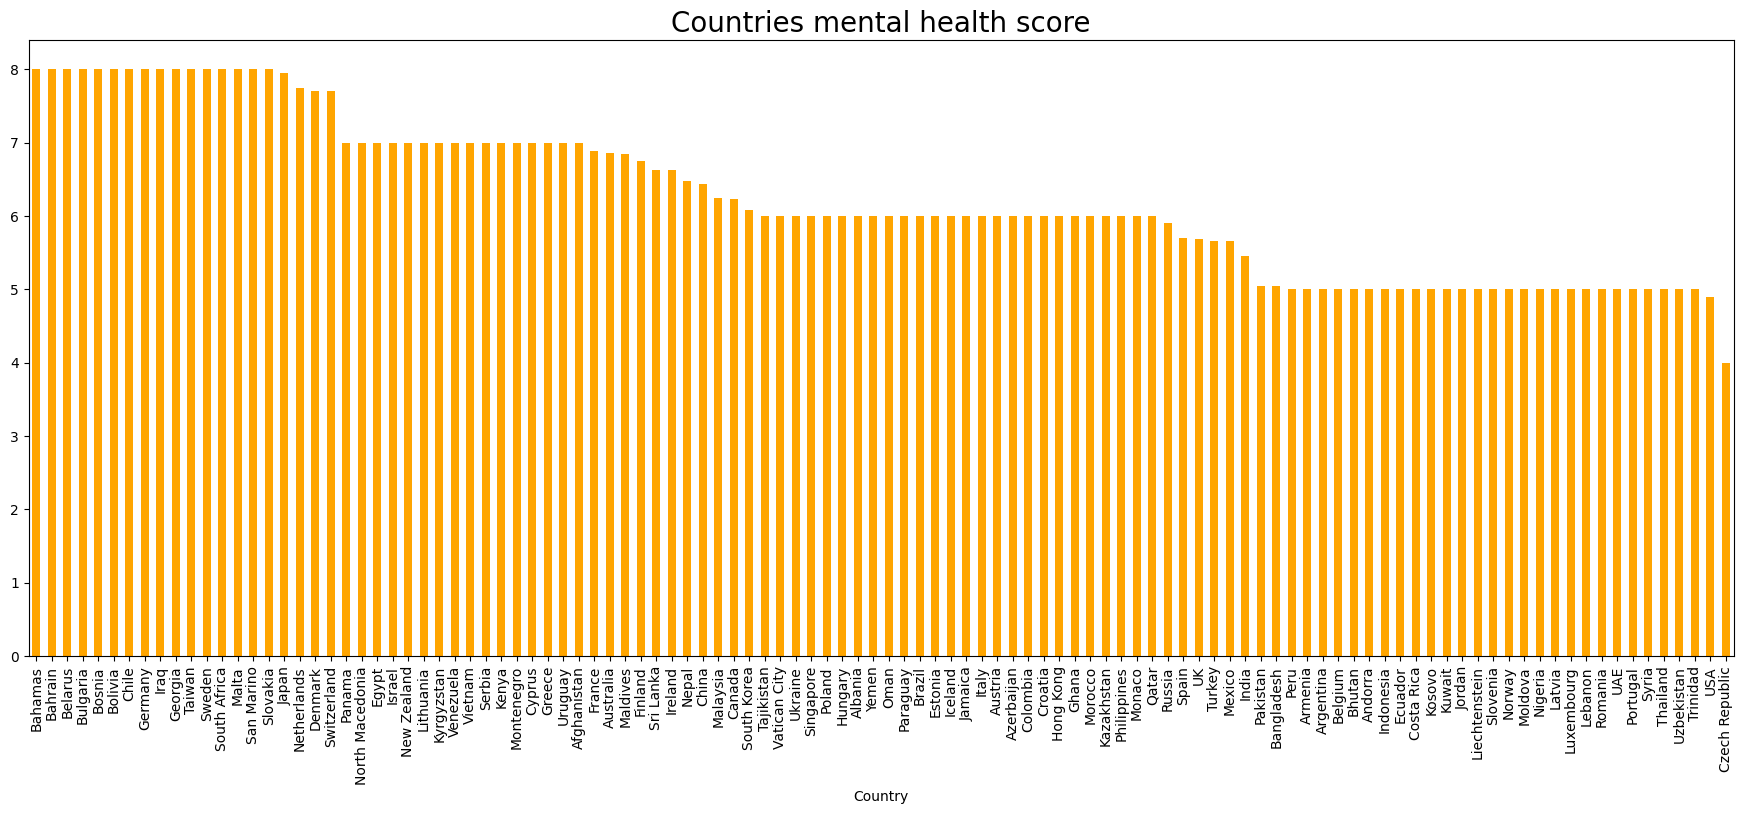

In [20]:
# countries mental health score
df.groupby('Country')['Mental_Health_Score'].mean().sort_values(ascending=False).plot(kind = 'bar', color = 'orange')
plt.title('Countries mental health score', fontsize=20)

Text(0.5, 1.0, 'Most Used Social Media Platforms by Gender')

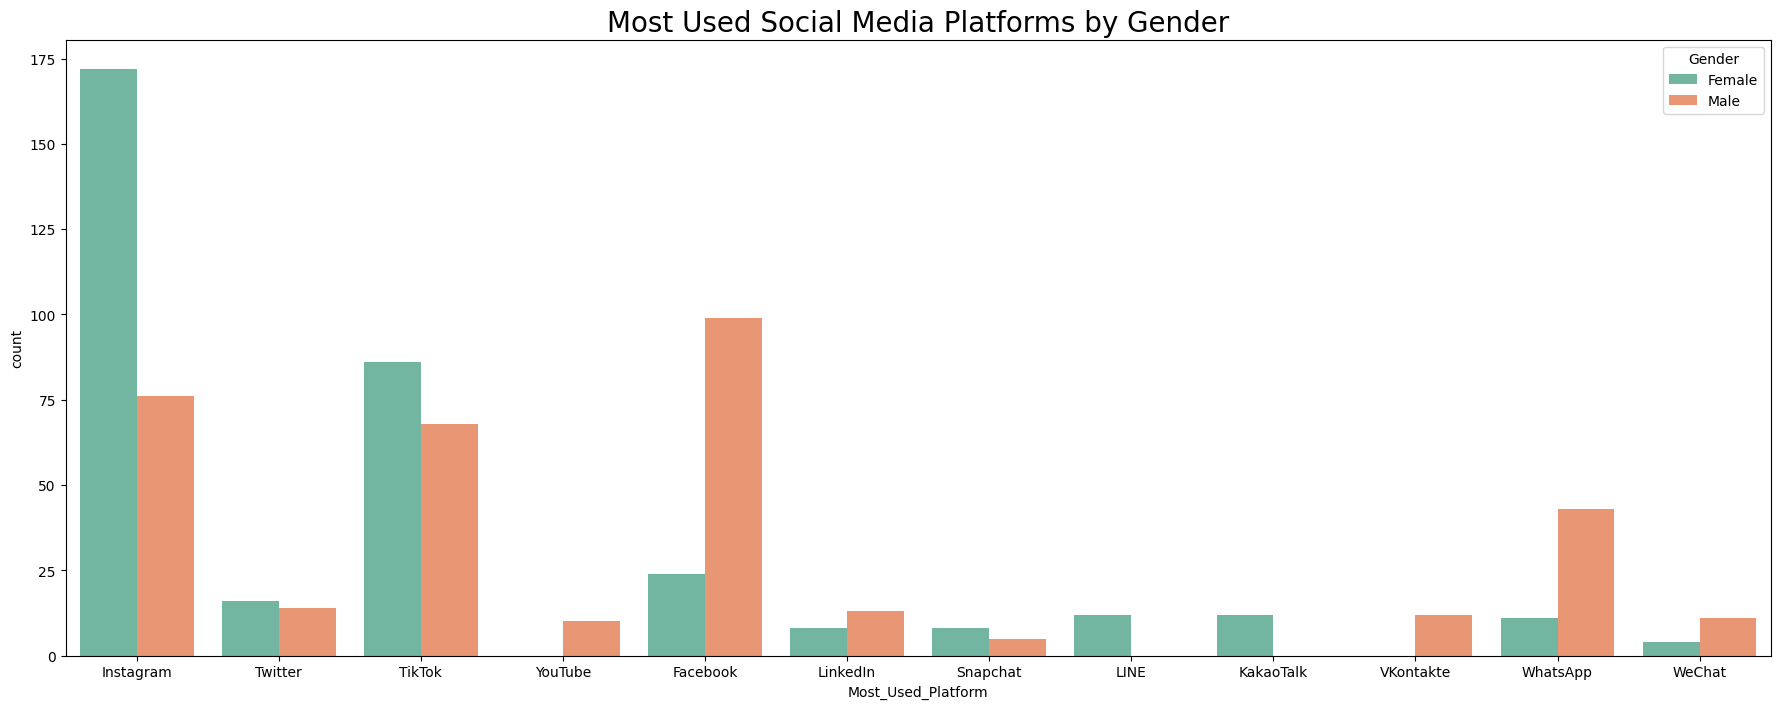

In [21]:
# most used social media platforms by gender
sns.countplot(data = df,x = 'Most_Used_Platform', hue = 'Gender', palette = 'Set2')
plt.title('Most Used Social Media Platforms by Gender', fontsize=20)

Most numbers of Female students use Instagram while Male student use Facebook.

Text(0.5, 1.0, 'Which Social Media Platform Most Active Hours')

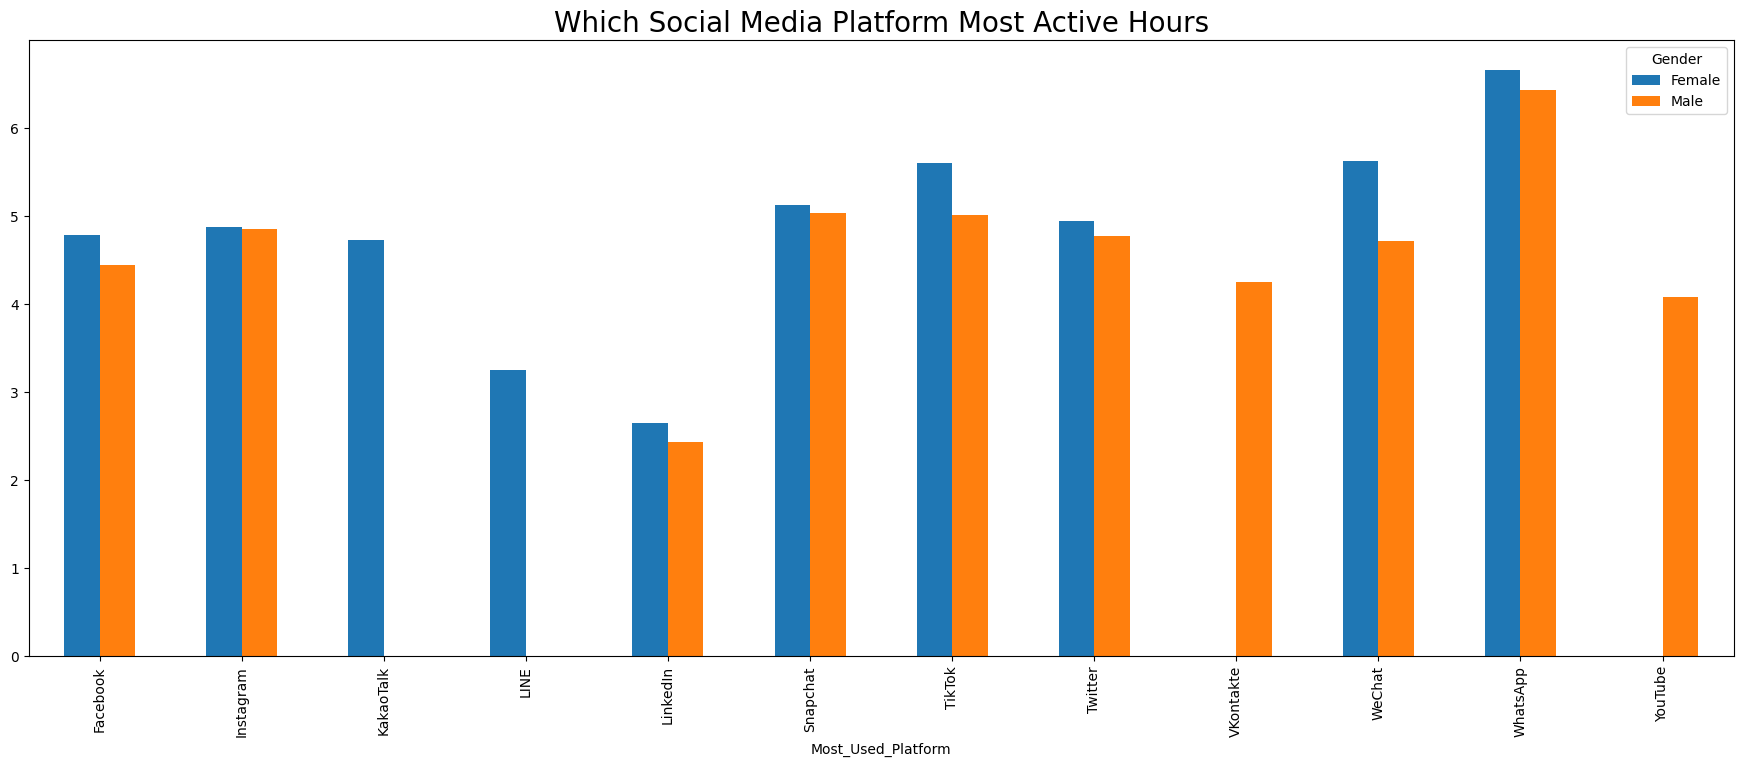

In [22]:
# which social media platform most active hours
most_used_pl_gender = df.groupby(['Most_Used_Platform','Gender'])['Avg_Daily_Usage_Hours'].mean().sort_values(ascending=False).unstack().plot(kind = 'bar')
plt.title('Which Social Media Platform Most Active Hours', fontsize=20)

whatsapp has most active hours both and female

Text(0.5, 1.0, 'Most Used Social Media Platforms in Each Country')

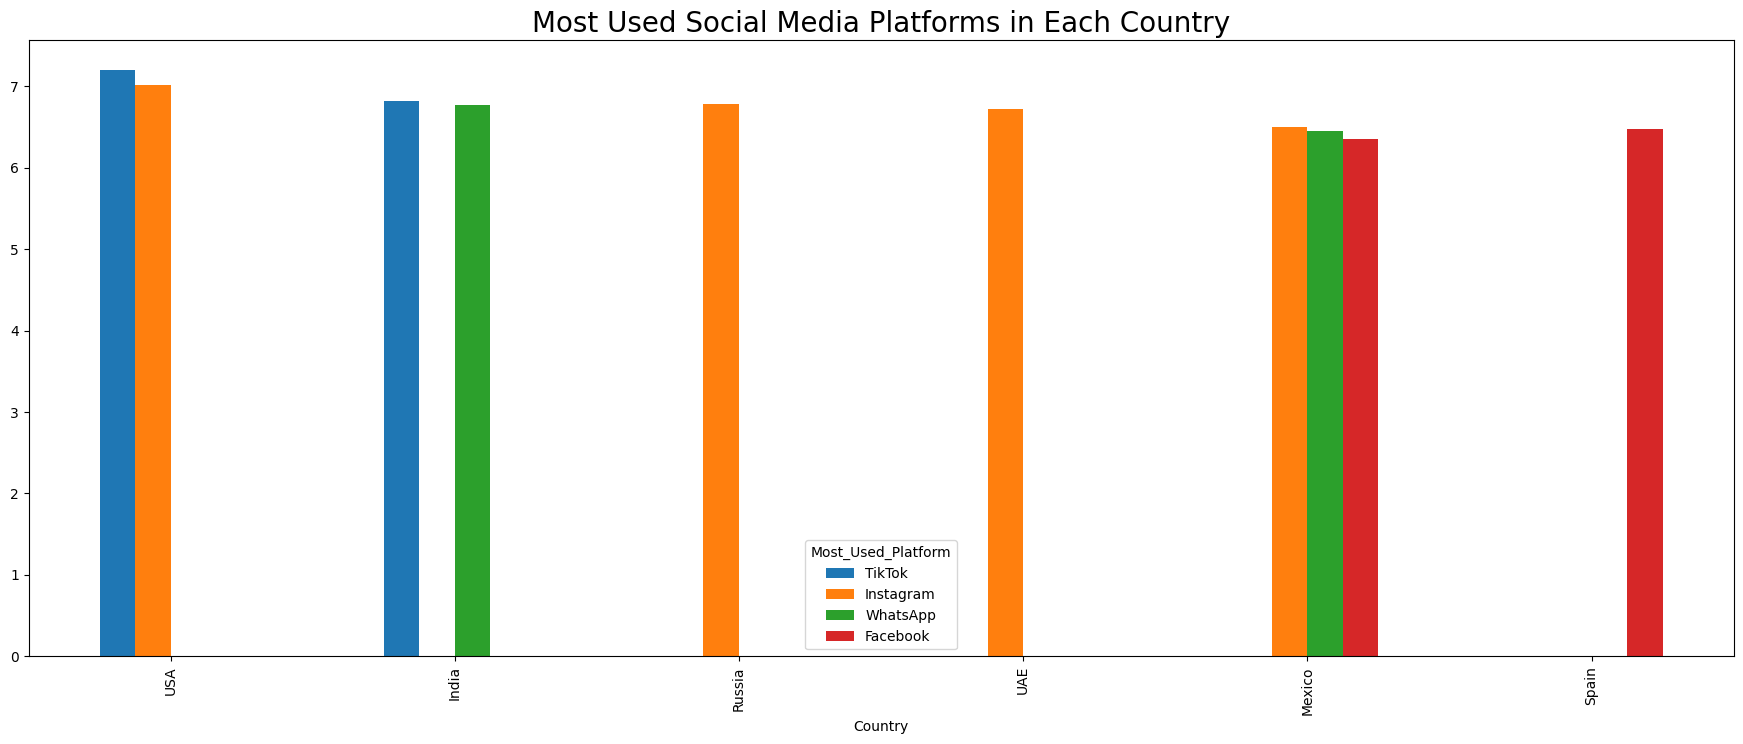

In [23]:
#most used social media platforms in each country
df.groupby(['Country','Most_Used_Platform'])['Avg_Daily_Usage_Hours'].mean().sort_values(ascending=False).head(10).unstack().plot(kind = 'bar')
plt.title('Most Used Social Media Platforms in Each Country', fontsize=20)

Text(0.5, 1.0, 'Mental Health Score as per Gender of Different Social Media Platforms')

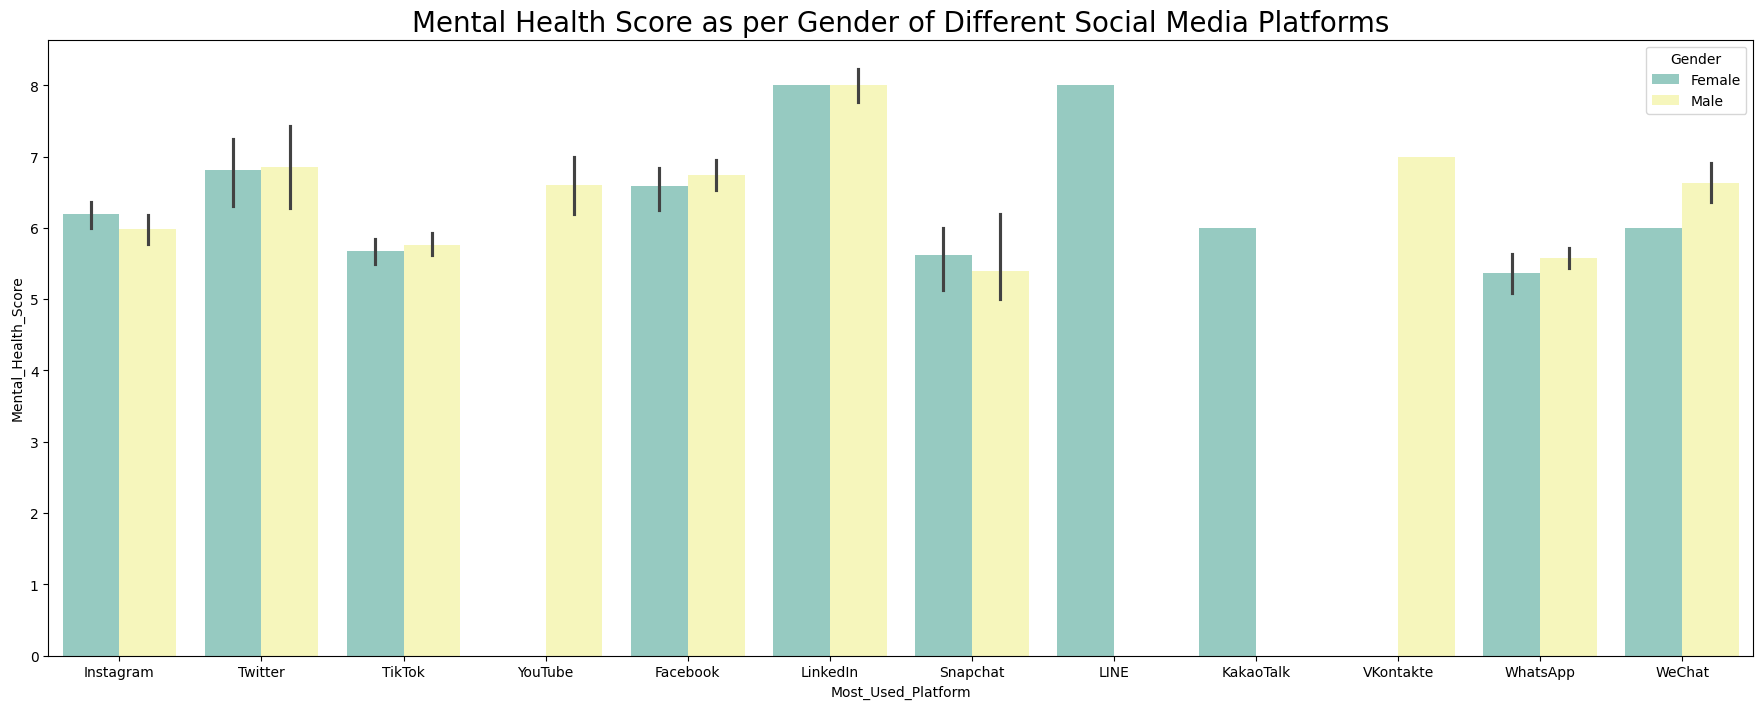

In [24]:
# mental health score as per gender of different social media platforms
sns.barplot(data = df,x = 'Most_Used_Platform', y = 'Mental_Health_Score', hue = 'Gender', palette = 'Set3', estimator = 'mean')
plt.title('Mental Health Score as per Gender of Different Social Media Platforms', fontsize=20)

LinkedIn has highest mental health score and pltforms like snapchat, whatsapp and tiktok etc has lowest score.

LINE AND KakaoTalk is only used by Female studens

In [25]:
# LINE and KakaoTalk details
df[df['Most_Used_Platform'].isin(['LINE','KakaoTalk'])].head()

,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
224,19,Female,Undergraduate,Japan,3.8,LINE,No,7.9,8,Single,1,3
226,20,Female,Undergraduate,South Korea,5.2,KakaoTalk,Yes,6.5,6,In Relationship,3,6
232,19,Female,Undergraduate,Japan,3.5,LINE,No,8.0,8,Single,1,3
234,20,Female,Undergraduate,South Korea,5.0,KakaoTalk,Yes,6.8,6,Single,3,6
240,19,Female,Undergraduate,Japan,3.7,LINE,No,7.8,8,Single,1,3


these apps are only used in South Korea and Japan and studens are Female and undergraduate.

Text(0.5, 1.0, 'Addicted Score Based on Social Media Platform')

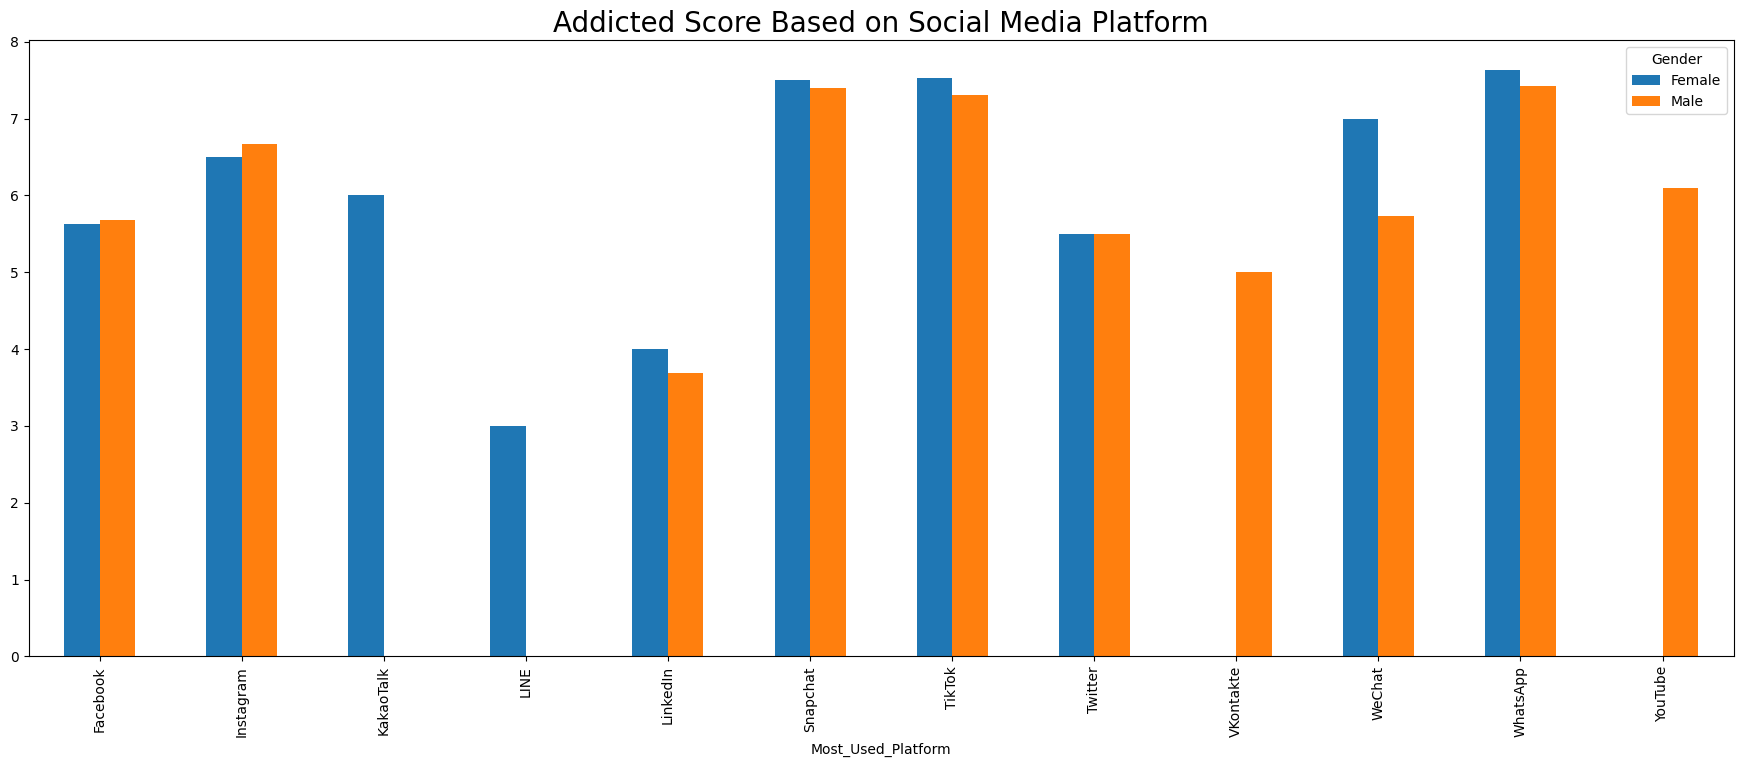

In [26]:
# addicted score based on social media platform
df.groupby(['Most_Used_Platform','Gender'])['Addicted_Score'].mean().sort_values(ascending=False).unstack().plot(kind = 'bar') 
plt.title('Addicted Score Based on Social Media Platform', fontsize=20)

social media pltforms like Snapchat, Titktok and whatsapp has highest addicted score and platforms like Line, LinkedIn has least addicted score.

Text(0.5, 1.0, 'Addiction score based on country')

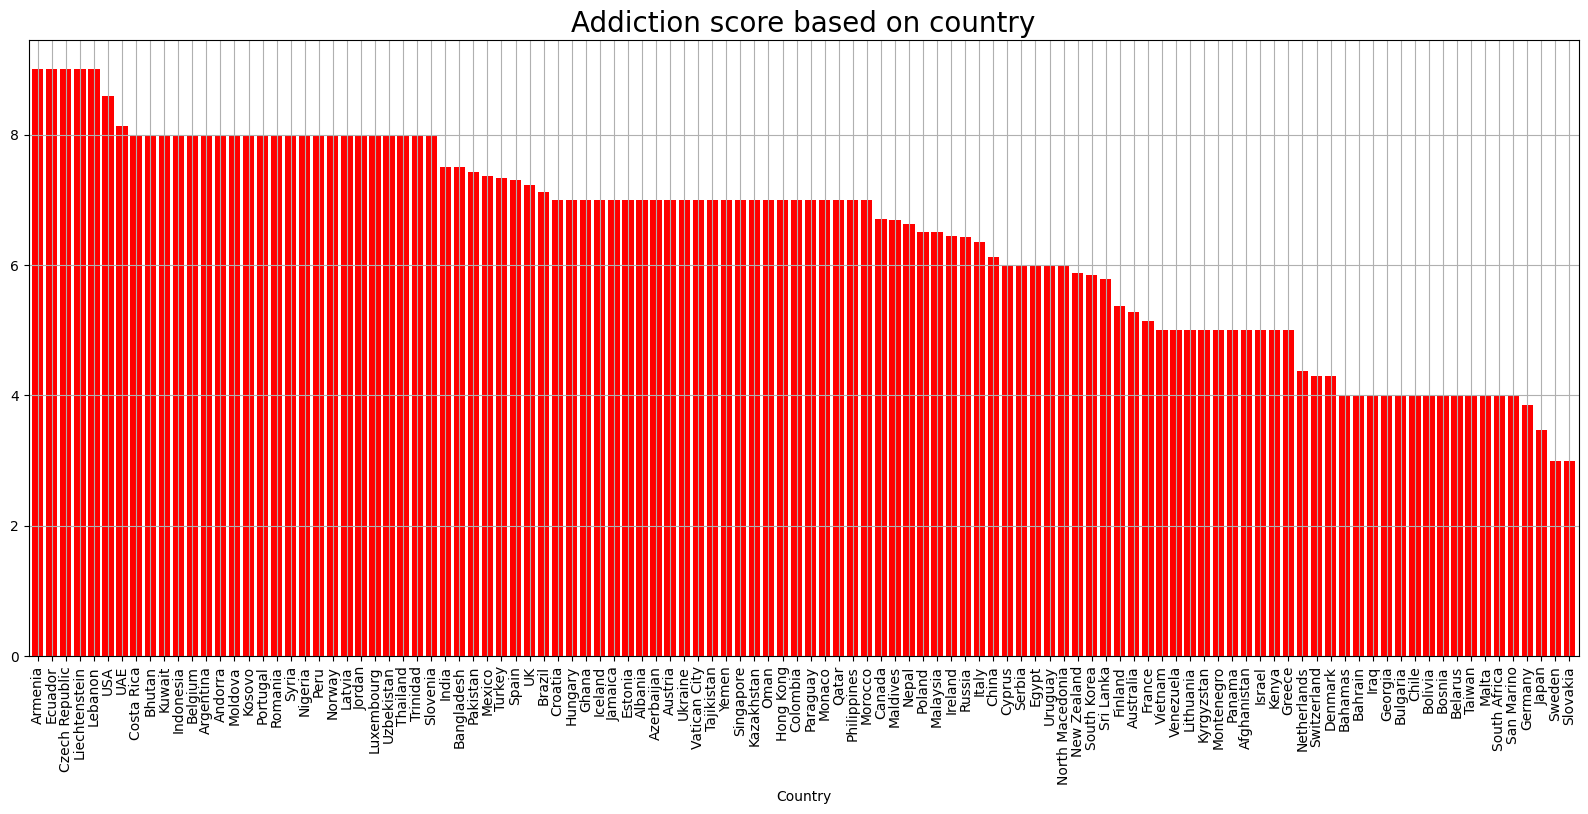

In [27]:
# social media addiction based on country
df.groupby(['Country'])['Addicted_Score'].mean().sort_values(ascending=False).plot(kind = 'bar', figsize=(20, 8), width=0.8, grid=True, color = 'red')
plt.title('Addiction score based on country', fontsize=20)

Text(0.5, 1.0, 'Addiction Score Based on Gender')

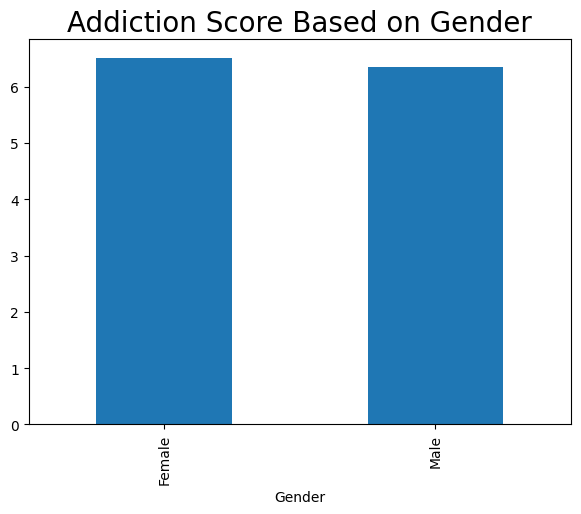

In [28]:
# addiction score based on gender
df.groupby(['Gender'])['Addicted_Score'].mean().sort_values(ascending=False).plot(kind = 'bar',figsize=(7, 5))
plt.title('Addiction Score Based on Gender', fontsize=20)

Text(0.5, 1.0, 'Addiction Score Based on Age')

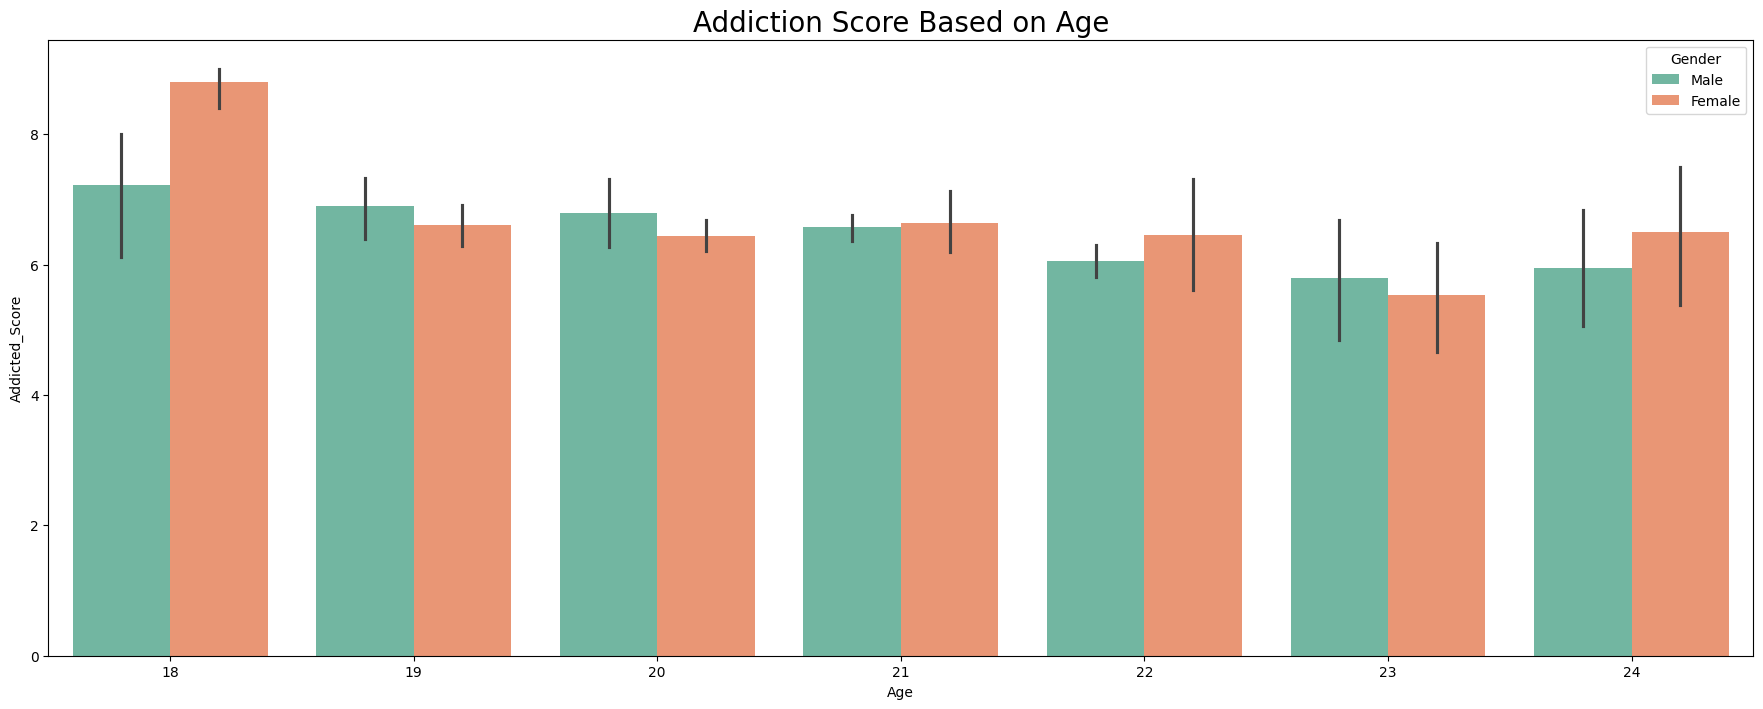

In [29]:
#addiction score based on age
sns.barplot(data = df, x = 'Age',y = 'Addicted_Score', hue = 'Gender', palette = 'Set2', estimator = 'mean')
plt.title('Addiction Score Based on Age', fontsize=20)

students, age of 18 have higest addicted score, as they grew addiction decreases 

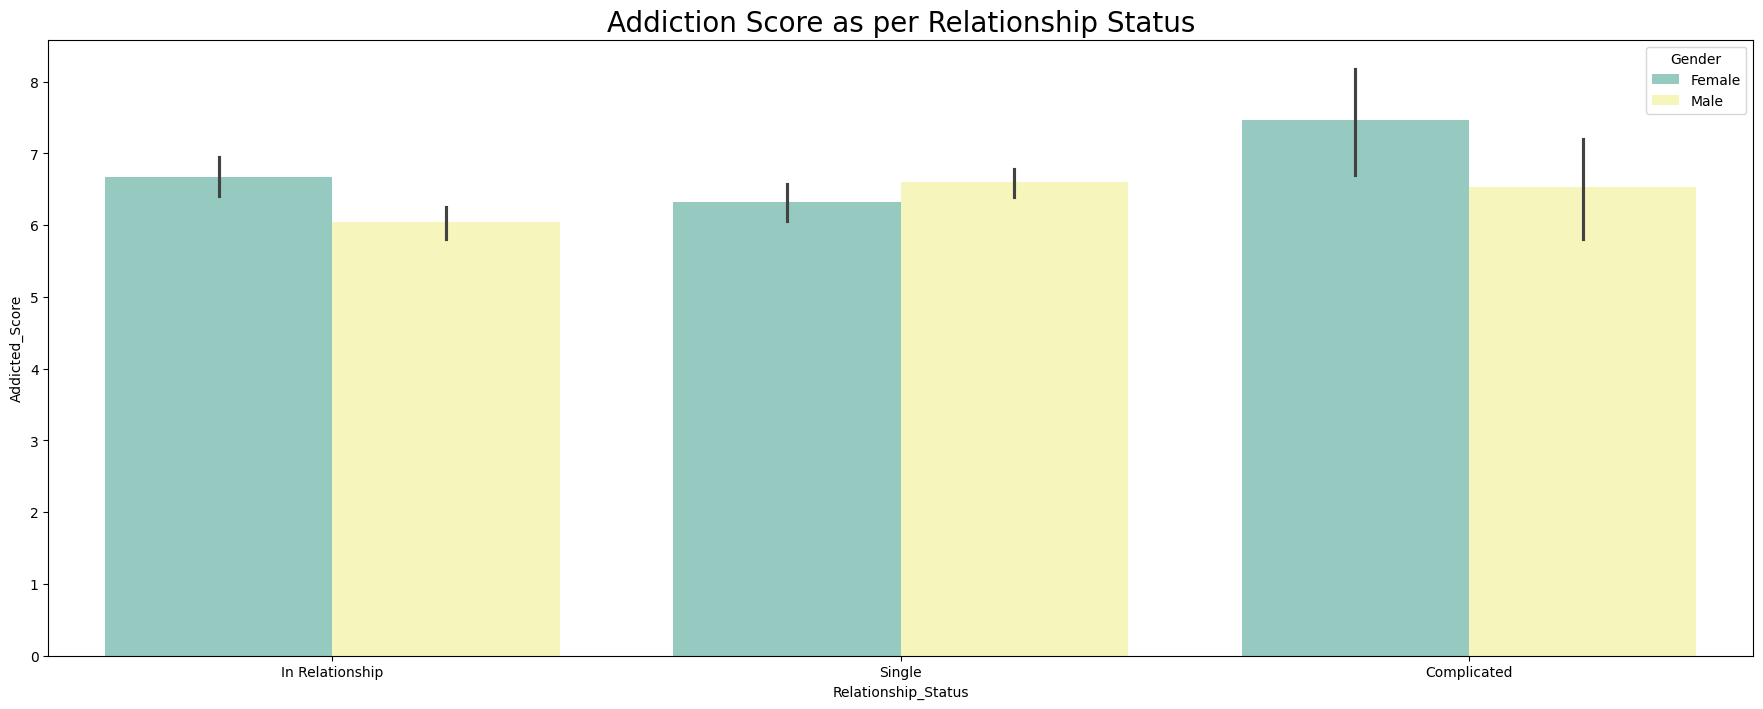

In [30]:
 # Addiction score as per relationship status
sns.barplot(data = df,x = 'Relationship_Status', y = 'Addicted_Score', hue_norm = 'Gender', hue = 'Gender', palette = 'Set3', estimator='mean')
plt.title('Addiction Score as per Relationship Status', fontsize=20);

complicated relationship has highest addicted score

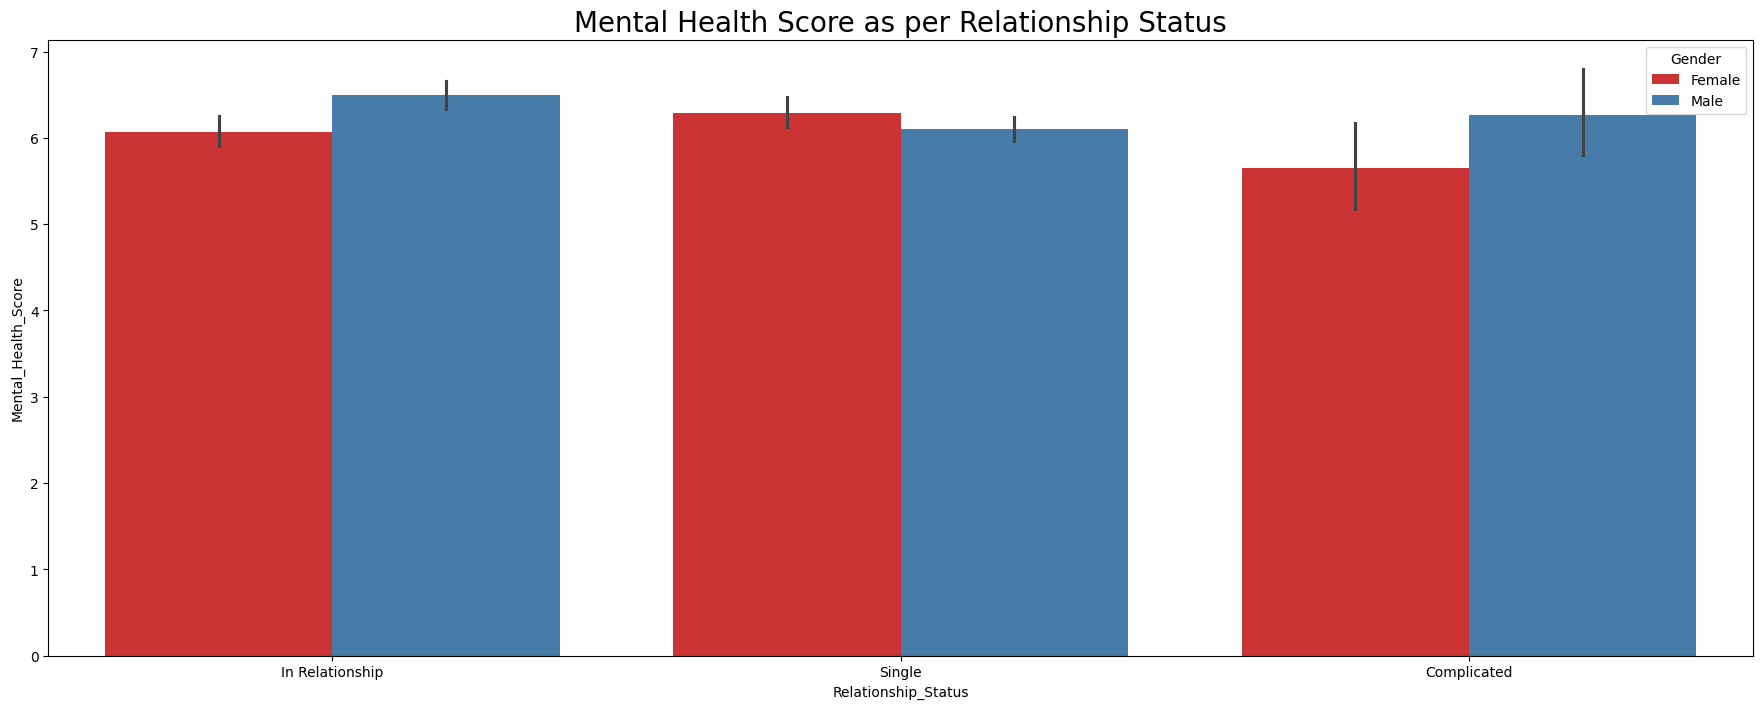

In [31]:
#mental health score as per relationship status
sns.barplot(data = df,x = 'Relationship_Status', y = 'Mental_Health_Score', hue_norm = 'Gender', hue = 'Gender', palette = 'Set1', estimator = 'mean')
plt.title('Mental Health Score as per Relationship Status', fontsize=20);

Opposite of above addicted score, as expected.

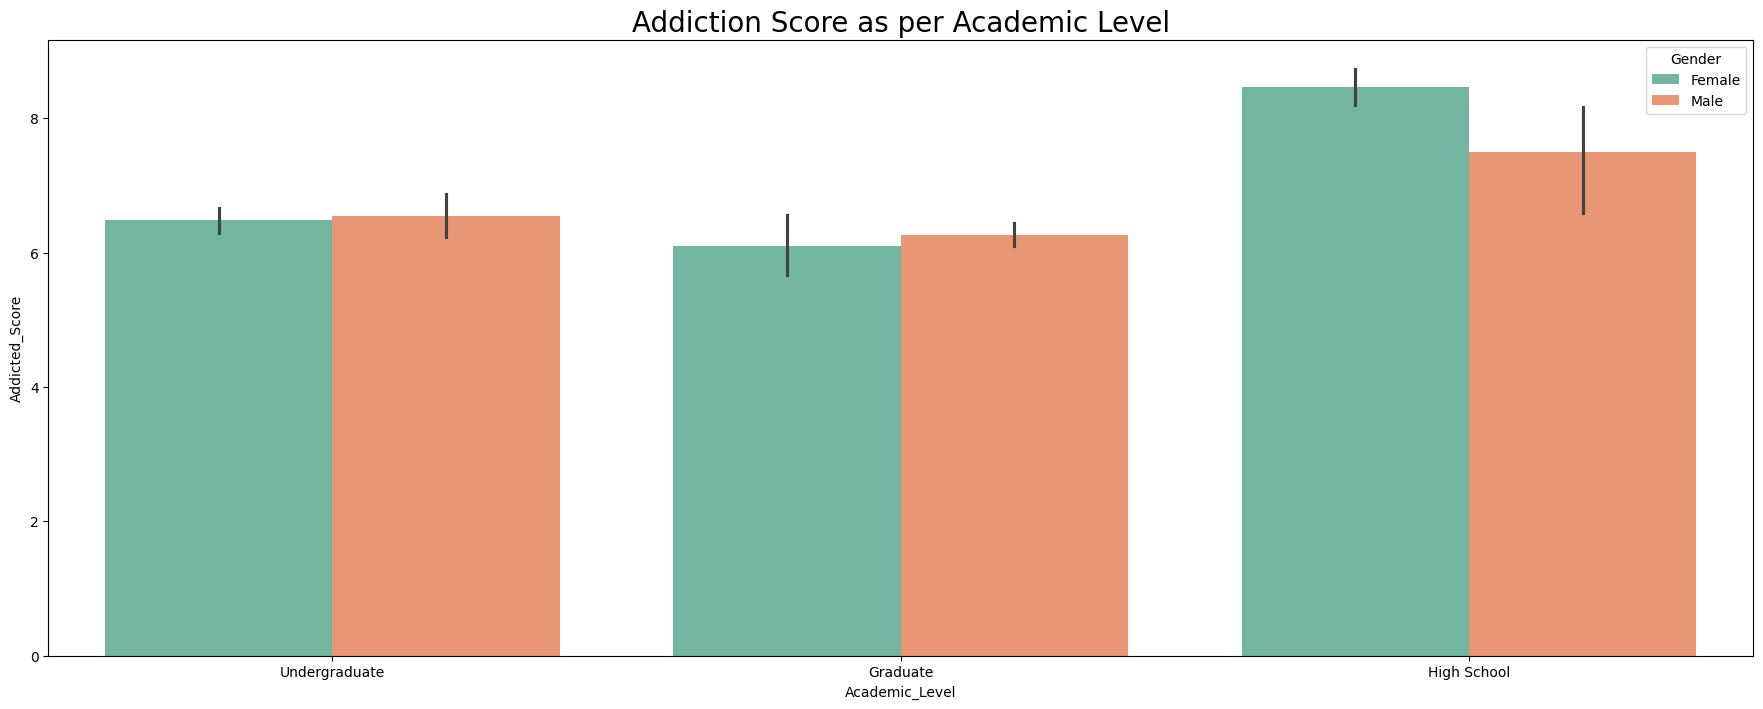

In [32]:
#addiction score as per academic level
sns.barplot(data = df,x = 'Academic_Level', y = 'Addicted_Score', hue_norm = 'Gender', hue = 'Gender', palette = 'Set2', estimator = np.mean)
plt.title('Addiction Score as per Academic Level', fontsize=20);

High school students are highly addicted to social media.

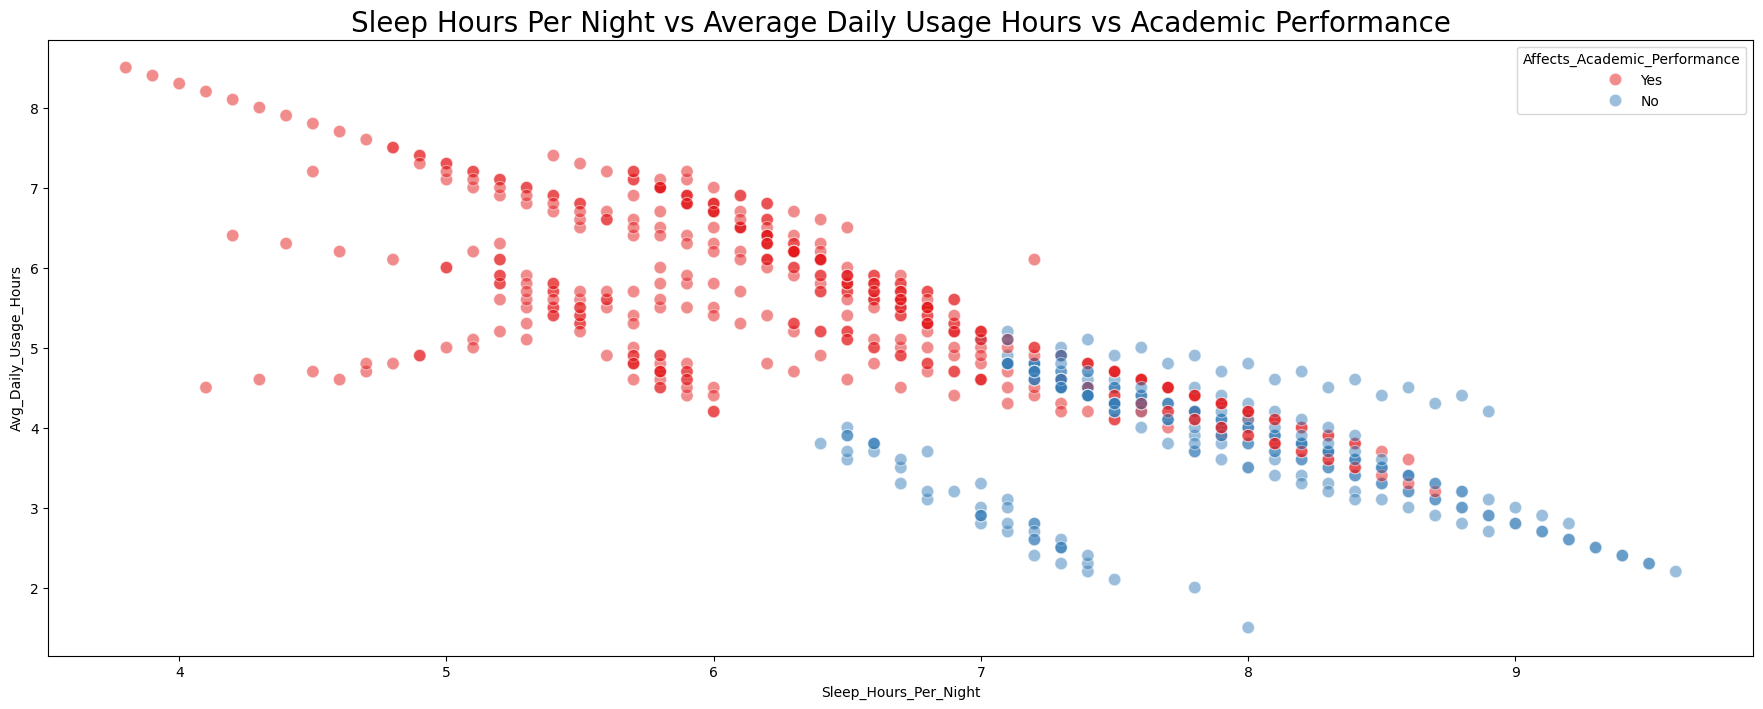

In [33]:
sns.scatterplot(data =df, x = 'Sleep_Hours_Per_Night', y = 'Avg_Daily_Usage_Hours', hue = 'Affects_Academic_Performance', palette = 'Set1', alpha = 0.5, s = 80)
plt.title('Sleep Hours Per Night vs Average Daily Usage Hours vs Academic Performance', size = 20);

students how have less 'Sleep_Hours_Per_Night' have high 'Avg_Daily_Usage_Hours'therefore also has affect on their academic performance.

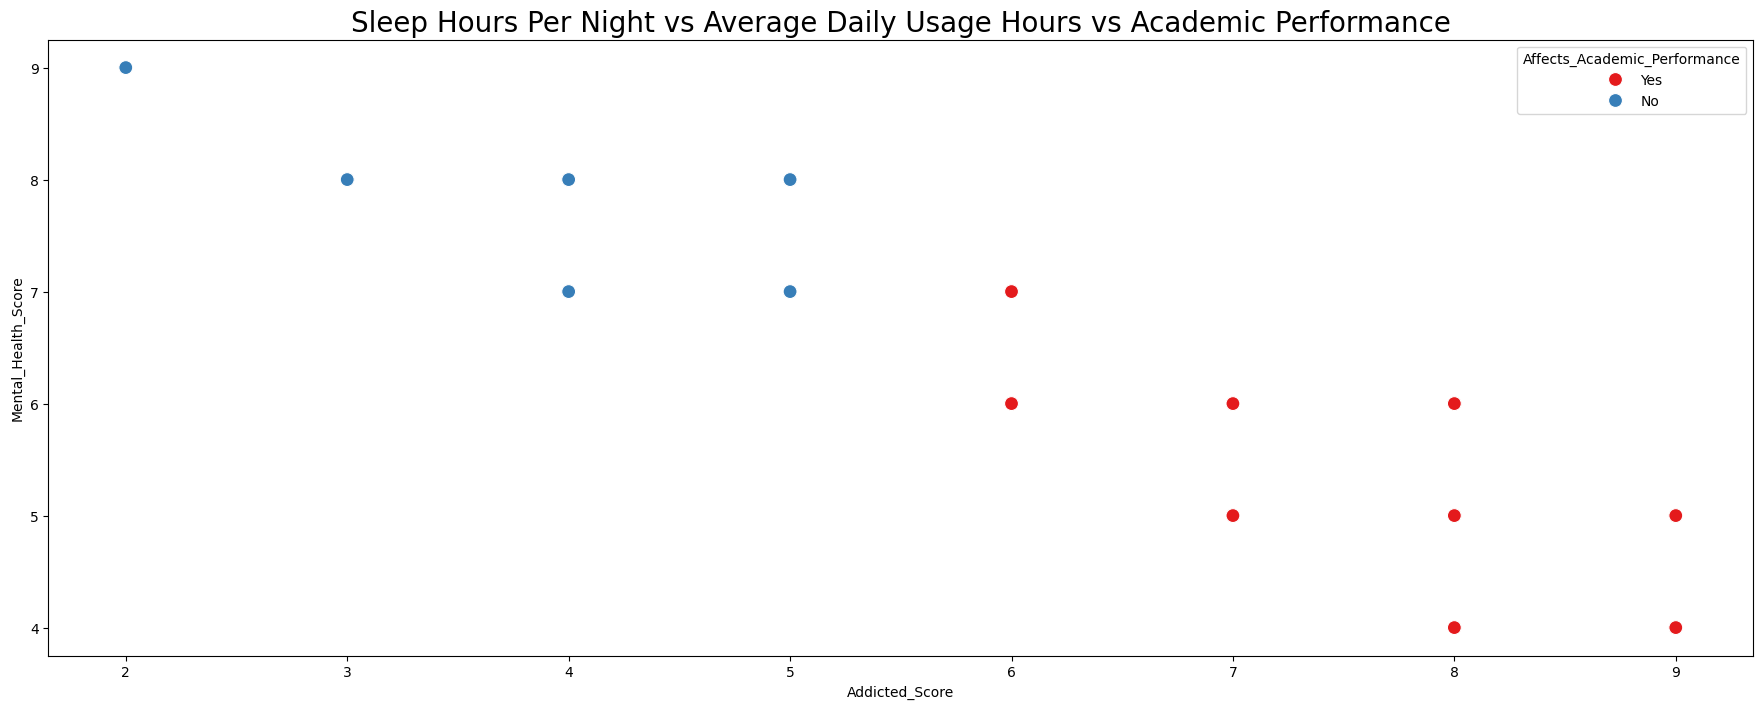

In [34]:
sns.scatterplot(data =df, x = 'Addicted_Score', y = 'Mental_Health_Score', hue = 'Affects_Academic_Performance', palette = 'Set1', s = 100)
plt.title('Sleep Hours Per Night vs Average Daily Usage Hours vs Academic Performance', size = 20);

# Feature Engineering

In [35]:
df.head()

,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [36]:
#drop column Addicted_Score
df.drop(['Country','Most_Used_Platform', 'Affects_Academic_Performance'], axis=1, inplace=True)

In [37]:
#changing addicted score to binary varaible
df['Addicted_Score'] = np.where(df['Addicted_Score']>7, 1,0)

In [38]:
# changing Conflicts_Over_Social_Media to binary 
df['Conflicts_Over_Social_Media'] = np.where(df.Conflicts_Over_Social_Media > 0, 1, 0) 

In [39]:
df.head()

,Age,Gender,Academic_Level,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,19,Female,Undergraduate,5.2,6.5,6,In Relationship,1,1
1,22,Male,Graduate,2.1,7.5,8,Single,0,0
2,20,Female,Undergraduate,6.0,5.0,5,Complicated,1,1
3,18,Male,High School,3.0,7.0,7,Single,1,0
4,21,Male,Graduate,4.5,6.0,6,In Relationship,1,0


In [40]:
# trian test split
x, y = df.drop('Addicted_Score', axis = 1), df['Addicted_Score']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [41]:
# one hot encoding and scaling
col_transformer = ColumnTransformer([('onehot', OneHotEncoder(drop = 'first'), x_train.select_dtypes(include=['string']).columns)],
                                     remainder='passthrough')

In [42]:
#transform
x_train = col_transformer.fit_transform(x_train)
x_test = col_transformer.transform(x_test)


# Model Training

In [43]:
# applying Decision Tree Classifier
dtc = DecisionTreeClassifier()

#fit
dtc.fit(x_train, y_train)

#preds
dtc_preds = dtc.predict(x_test)

In [44]:
#model evaluation
print('F1_score :', f1_score(y_test, dtc_preds))
print('Precision_score :', precision_score(y_test, dtc_preds))
print('Recall_score :', recall_score(y_test, dtc_preds))

F1_score : 0.972972972972973
Precision_score : 0.9473684210526315
Recall_score : 1.0


In [45]:
dtc.feature_importances_

array([0.03965313, 0.        , 0.        , 0.        , 0.03150854,
       0.01692728, 0.1435599 , 0.09339898, 0.67495217, 0.        ])

In [51]:
col_transformer.get_feature_names_out()

array(['onehot__Gender_Male', 'onehot__Academic_Level_High School',
       'onehot__Academic_Level_Undergraduate',
       'onehot__Relationship_Status_In Relationship',
       'onehot__Relationship_Status_Single', 'remainder__Age',
       'remainder__Avg_Daily_Usage_Hours',
       'remainder__Sleep_Hours_Per_Night',
       'remainder__Mental_Health_Score',
       'remainder__Conflicts_Over_Social_Media'], dtype=object)

<Axes: >

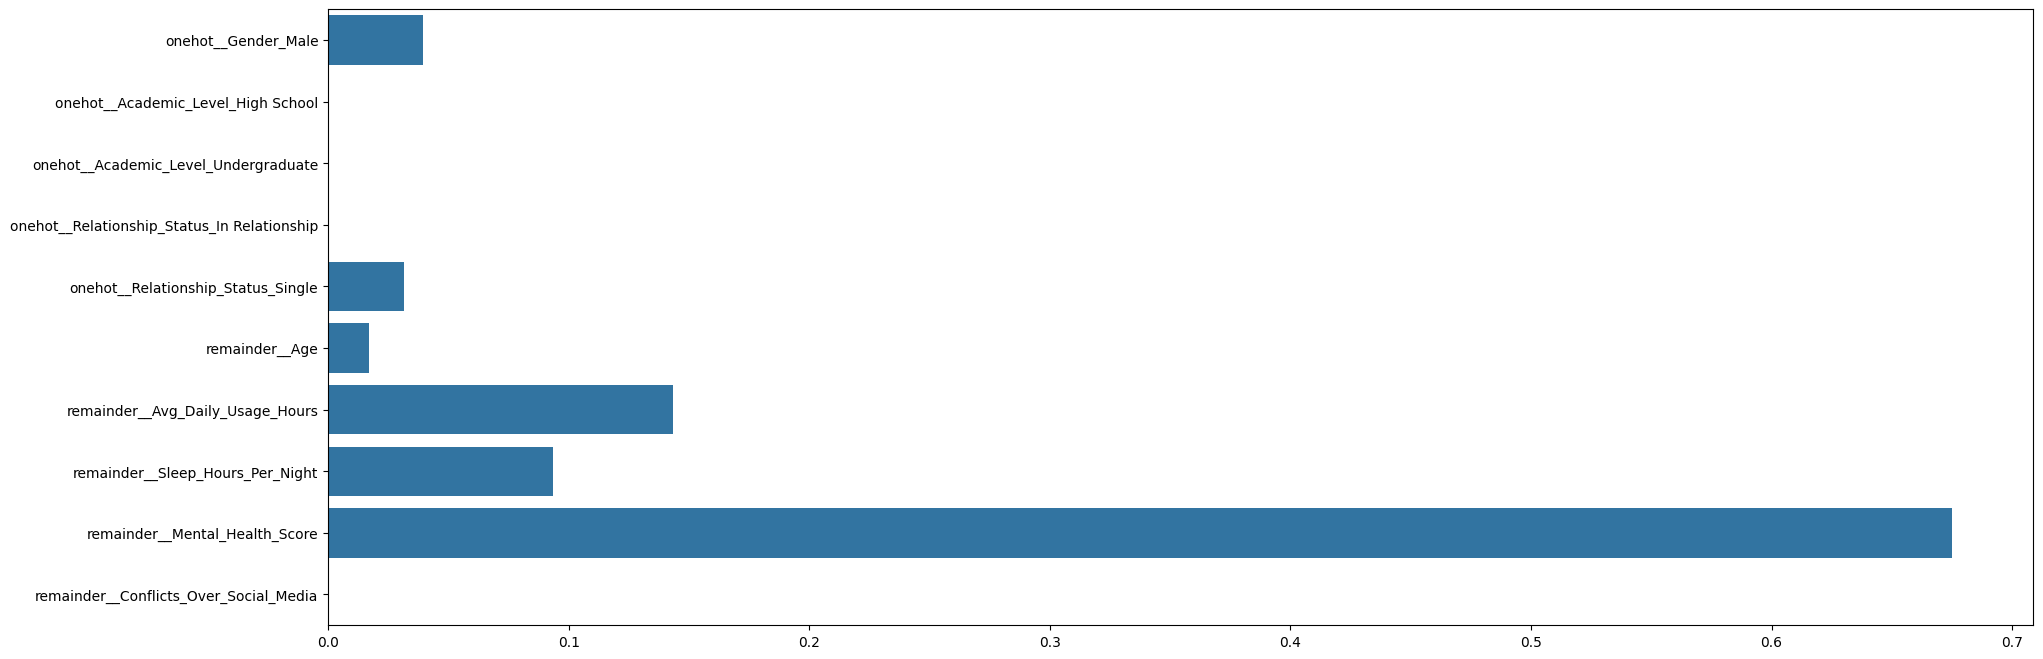

In [54]:
sns.barplot(y = col_transformer.get_feature_names_out(),x = dtc.feature_importances_ )